# Monowai CC tests

In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import os
import ccf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%matplotlib notebook

## Merge files

In [4]:
dsets = ccf.merge_datasets(sorted(glob('test?.nc')), extract=False, fast=True)

/Users/psmets/Documents/Research/_progs/_Python/ccf/ccf/core/core.py:124: UserWarning: Dataset metadata sha256 hash is inconsistent.
  UserWarning
/Users/psmets/Documents/Research/_progs/_Python/ccf/ccf/core/core.py:124: UserWarning: Dataset metadata sha256 hash is inconsistent.
  UserWarning
/Users/psmets/Documents/Research/_progs/_Python/ccf/ccf/core/core.py:124: UserWarning: Dataset metadata sha256 hash is inconsistent.
  UserWarning
/Users/psmets/Documents/Research/_progs/_Python/ccf/ccf/core/core.py:124: UserWarning: Dataset metadata sha256 hash is inconsistent.
  UserWarning
/Users/psmets/Documents/Research/_progs/_Python/ccf/ccf/core/core.py:124: UserWarning: Dataset metadata sha256 hash is inconsistent.
  UserWarning
/Users/psmets/Documents/Research/_progs/_Python/ccf/ccf/core/core.py:124: UserWarning: Dataset metadata sha256 hash is inconsistent.
  UserWarning


In [5]:
dsets

<xarray.Dataset>
Dimensions:      (lag: 1080000, pair: 2, time: 24)
Coordinates:
  * pair         (pair) object 'IM.H10N1..EDH-IU.RAR.10.BHR' 'IM.H10N1..EDH-IU.RAR.10.BHZ'
  * time         (time) datetime64[ns] 2015-01-15 ... 2015-01-17T21:00:00
  * lag          (lag) timedelta64[ns] 00:00:00 ... 05:59:59.980000
Data variables:
    distance     (pair) float64 1.399e+04 1.399e+04
    status       (pair, time) int8 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    pair_offset  (pair, time) timedelta64[ns] 00:00:00.005500 ... 00:00:00.005500
    time_offset  (pair, time) timedelta64[ns] 00:00:00 00:00:00 ... 00:00:00
    cc           (pair, time, lag) float32 0.00025914886 ... -0.0014778863
Attributes:
    title:                 Monowai Volcanic Centre Crosscorrelations - 2015.0...
    history:               Merged @ 2020-03-25 10:27:59.949600
    conventions:           CF-1.7
    institution:           Delft University of Technology, Department of Geos...
    author:                Pieter Smets - P.S.M.Smets@tudelft.nl
    source:                CTBTO/IMS hydroacoustic data and IRIS/USGS seismic...
    references:            Bendat, J. Samuel, & Piersol, A. Gerald. (1971). R...
    comment:               n/a
    ccf_version:           0.1.dev61+gaabcedf
    sha256_hash_metadata:  9b8e74f3ea30ddcabaa35a8d02523db70e059c64f0ed31762f...

<IPython.core.display.Javascript object>


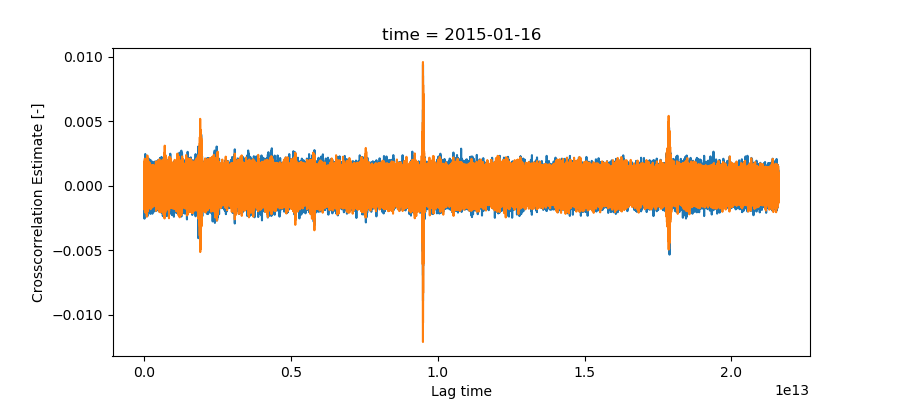

In [6]:
plt.figure(figsize=[9,4])
dsets.cc.loc[{'time':dsets.time[8]}].plot.line(x='lag',add_legend=False)

In [ ]:
plt.figure(figsize=[9,4])
dsets.cc.loc[{'pair':dsets.pair[0]}].plot.line(x='lag',add_legend=False)

In [ ]:
ccf.bias_correct_dataset(dsets)

In [ ]:
dsets

In [ ]:
dsets.history

In [ ]:
ccf.write_dataset(dsets,'merged.nc')